<h3>Introduction to image analysis</h3>
<h4>Imports and Basic image handling</h4>
<item>
    <h6>exercice 1-2-3: Reading an image, and checking its shape and data type</h6>
</item>

In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [17]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

In [3]:
print("Image Shape:", im_org.shape, "\nImage Type:", im_org.dtype)

Image Shape: (512, 512) 
Image Type: uint8


<h6>exercice 4: Displaying the image</h6>

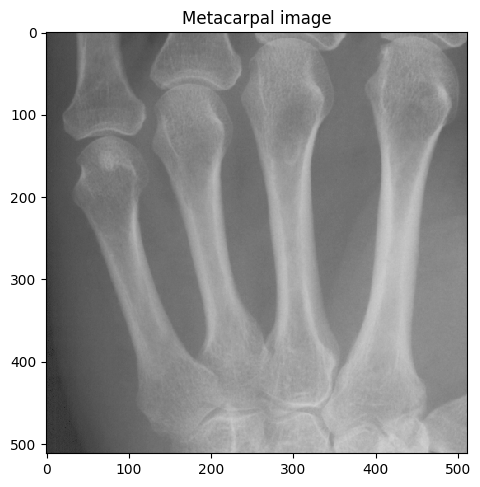

In [4]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

<h4>Color maps</h4>
<h6>exercice 5-6: Display an image using colormaps</h6>

Text(0.5, 1.0, 'pink colormaps')

<Figure size 640x480 with 0 Axes>

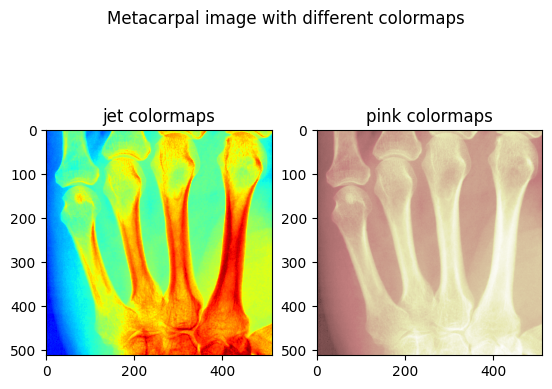

In [5]:
plt.figure()

f, axarr = plt.subplots(1, 2)
f.suptitle("Metacarpal image with different colormaps")
axarr[0].imshow(im_org, cmap="jet")
axarr[0].set_title("jet colormaps")
axarr[1].imshow(im_org, cmap="pink")
axarr[1].set_title("pink colormaps")
#io.imshow(im_org, cmap="jet")
#io.imshow(im_org, cmap="pink")
#plt.title('Metacarpal image (with colormap)')

<h4>Grey scale scaling</h4>
<h6>exercice 7: Scale visualisation on a grey scale</h6>

Before grey scaling


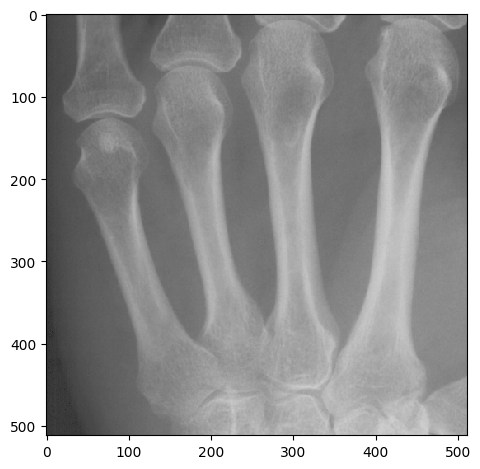

After Grey Scaling


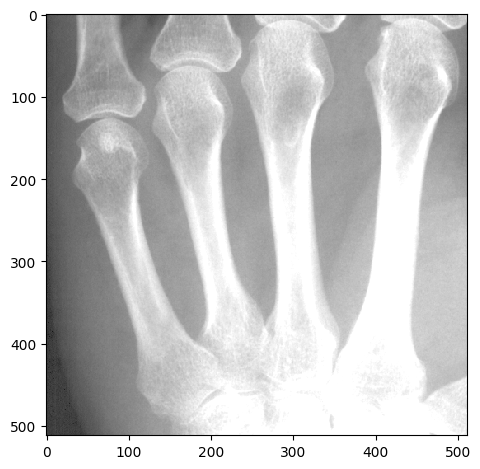

In [6]:
print("Before grey scaling")
io.imshow(im_org)
plt.show()
print("After Grey Scaling")
io.imshow(im_org, vmin=20, vmax=170)
plt.show()

<h5>Adaptive grey scaling based on the image min and max value</h5>

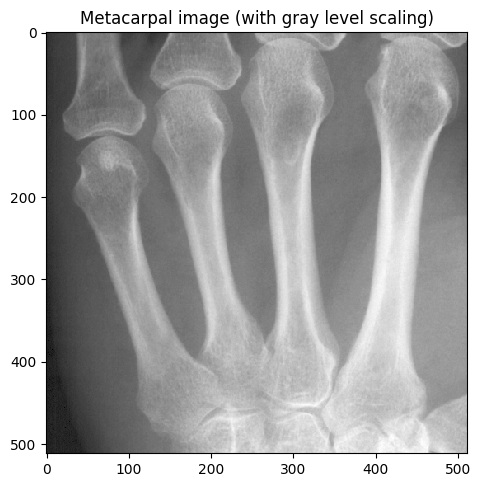

In [7]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()

<h4>Histogram function</h4>
<h6>exercice 8-9: Computing and visualising histograms, find the most common range of intensities</h6>

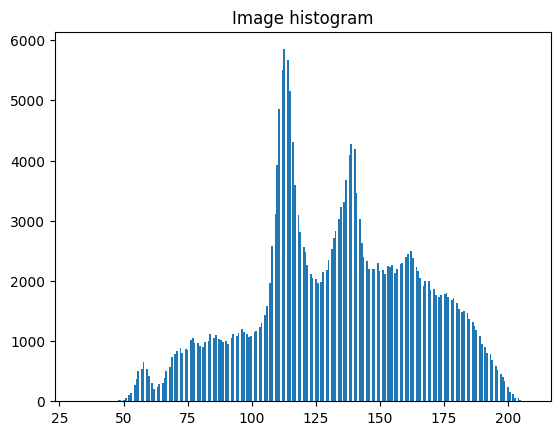

There are 1147.0 pixel values in bin 100


In [8]:
h = plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

(array([   77.,  5845., 15250., 19504., 57973., 45443., 48493., 36484.,
        26946.,  6129.]),
 array([ 32. ,  49.6,  67.2,  84.8, 102.4, 120. , 137.6, 155.2, 172.8,
        190.4, 208. ]),
 <BarContainer object of 10 artists>)

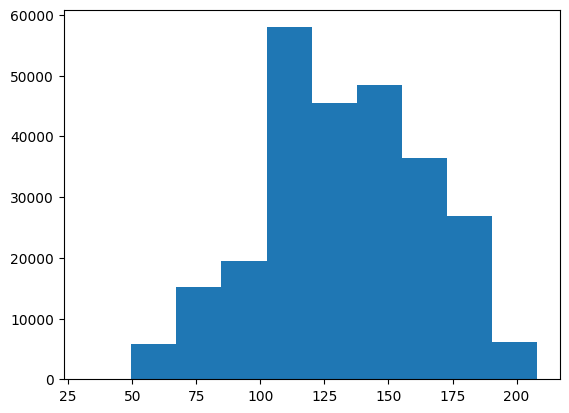

In [9]:
plt.hist(im_org.ravel())

In [11]:
max_frequency = np.max(h[0])
most_frequent_val = h[1][h[0].argmax()]
print("The most frequent range is: ", most_frequent_val, " and its frequency is: ", max_frequency)

The most frequent range is:  112.4375  and its frequency is:  5848.0


<h4>Pixel values and image coordinate systems</h4>
<h6>exercice 10-11-12-13: rows, columns and masks</h6>

In [12]:
r = 100
c = 50
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (100, 50) is: 108


In [13]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


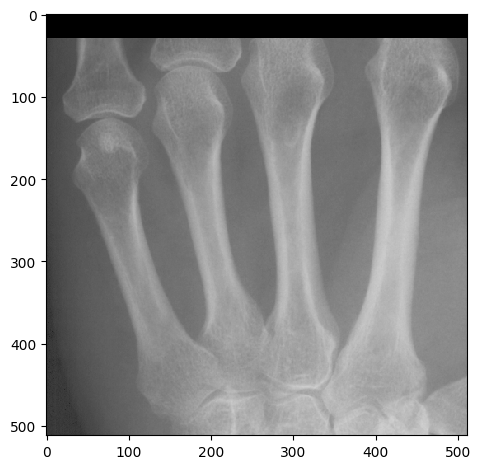

In [14]:
im_org[:30] = 0
io.imshow(im_org)
io.show()

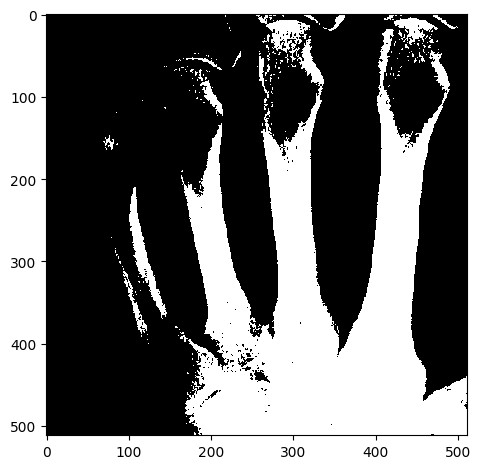

In [20]:
mask = im_org > 150
io.imshow(mask)
io.show()

<p>In Mask, values are strictly greater then 150 are replaced by 1 (true)</p>
<p>and values less or equal to 150 are replaced by 0 (false)</p>

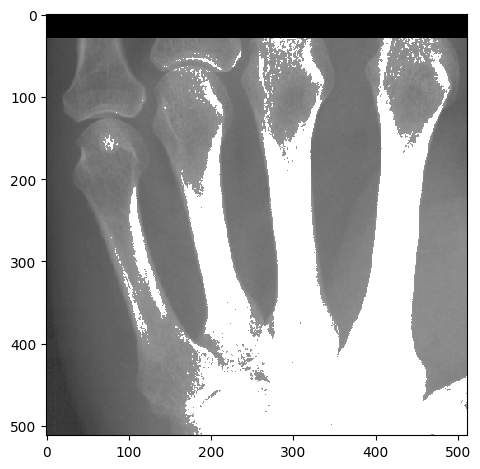

In [16]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

<h4>Section 2: Color Images</h4>
<h6>exercice 14 - 15 - 16: (R, G, B) on a new Image</h6>

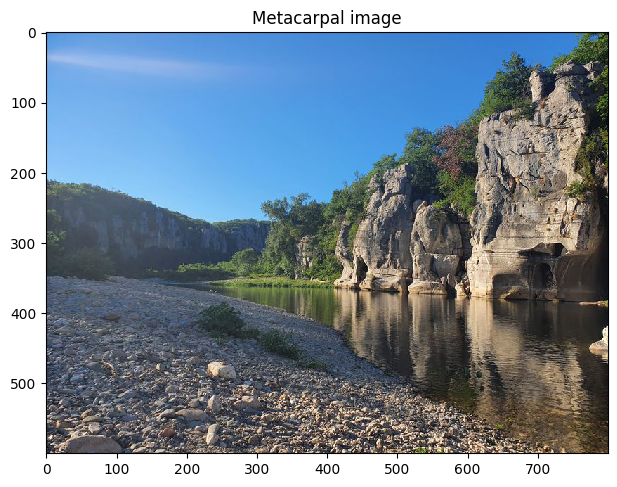

In [30]:
#an RGB image adeche.jpg
im_name = "ardeche.jpg"
#reading the image
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

In [25]:
print("Image Shape:", im_org.shape, "\nImage Type:", im_org.dtype)

Image Shape: (600, 800, 3) 
Image Type: uint8


<p>Another dimentionality is added, to handle the RGB, colors</p>
<p>so each pixel in the RGB image is a 3d vector, of the values for Red, Green and Blue</p>

In [29]:
#RGB values at pixel 
r = 110
c = 90
print(f"at pixed (110, 90), R: {im_org[r][c][0]}, G: {im_org[r][c][1]}, B: {im_org[r][c][2]}")

at pixed (110, 90), R: 119, G: 178, B: 238


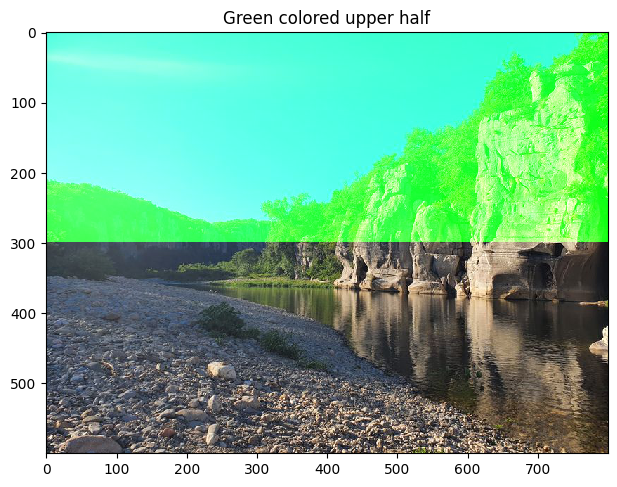

In [34]:
#Color the upper half of the photo green
for i in range(int(im_org.shape[0] / 2)):
        for column in im_org[i]:
            column[1] = 255
io.imshow(im_org)
plt.title('Green colored upper half')
io.show()

<h4>Section 3: Working with personal image</h4>
<h6>exercice 17, 18, 19, 20, 21: (R, G, B) on a new Image</h6>

original shape of the image is: (750, 948, 3)


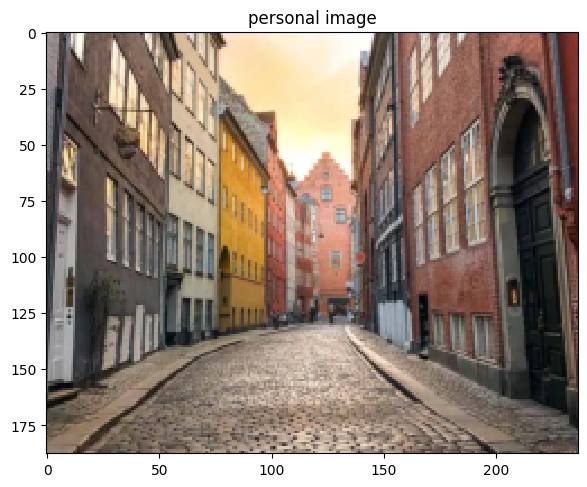

In [57]:
#an RGB image adeche.jpg
im_name = "personal.jpg"
#reading the image
im_org = io.imread(in_dir + im_name)
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)
print(f"original shape of the image is: {im_org.shape}")
#rescaling the image
io.imshow(image_rescaled)
plt.title('personal image')
io.show()

In [53]:
#shape of the image
print(image_rescaled.shape)
oned_image = image_rescaled.reshape(188*237, 3)
Red = oned_image[:, 0]
Green = oned_image[:, 1]
Blue = oned_image[:, 2]
print(f"(min, max) red : ({np.min(Red)}, {np.max(Red)}),\n\
(min, max) green : ({np.min(Green)}, {np.max(Green)}),\n\
(min, max) blue : ({np.min(Blue)}, {np.max(Blue)})")

(188, 237, 3)
(min, max) red : (0.003420838018588131, 1.0),
(min, max) green : (0.017023031514457398, 0.9999999996397557),
(min, max) blue : (0.010051162785521112, 0.9999999645972837)


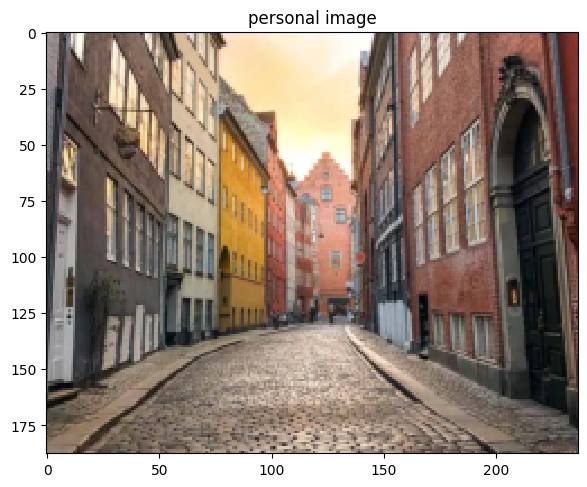

In [55]:
#resizing the image
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)
io.imshow(image_rescaled)
plt.title('personal image')
io.show()

scaled image is of shape: (316, 400, 3)


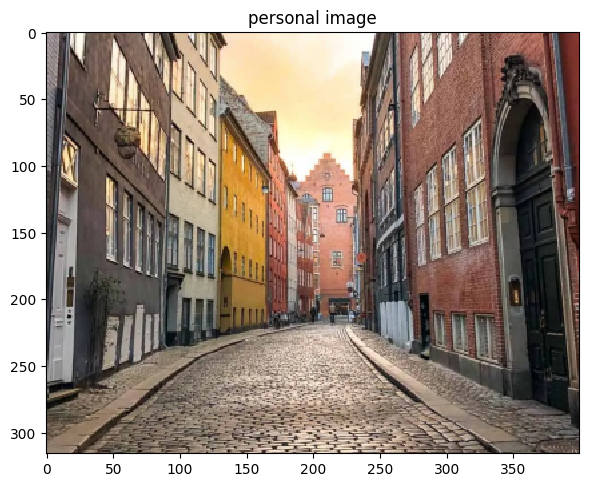

In [65]:
#rescaling the image such that the numbers of columns will always be equal to 400
image_rescaled_400 = rescale(im_org, 400 / im_org.shape[1], anti_aliasing=True,
                         channel_axis=2)
print(f"scaled image is of shape: {image_rescaled_400.shape}")
io.imshow(image_rescaled_400)
plt.title('personal image')
io.show()
